# Implement SGD for Linear Regression

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
boston=load_boston()

In [2]:
# spliting the data 

pd_boston=pd.DataFrame(data=boston.data)
price=boston.target
train_data, test_data, train_y, test_y=train_test_split(pd_boston, price, test_size=0.33, random_state=5)

In [3]:
# column standardization 
s=StandardScaler()
train_data=s.fit_transform(np.array(train_data))
test_data=s.transform(np.array(test_data))

In [4]:
#preparing training data for manual sgd regressor
manual_train=pd.DataFrame(data=train_data)
manual_train['price']=train_y

In [5]:
manual_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,13.4
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,23.6
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646,27.5


In [6]:
# converting to numpy array, which will be available for both SGDRegressor of sklearn and manual sgd regressor
test_data=np.array(test_data)
test_y=np.array(test_y)

#  SGDRegressor 

In [7]:
b_diff=[]
w_num=[]

In [8]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# 
def sklearn_sgd(alpha, eta0=0.01, power_t=0.25, n_iter=100, train_data=train_data, test_data=test_data, train_y=train_y, test_y=test_y):
    clf=SGDRegressor(alpha=alpha, penalty=None, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(train_data, train_y)
    y_pred=clf.predict(test_data)
    
    #scatter plot
    plt.scatter(test_y,y_pred)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    print('***********************************************************')
       
    sgd_error=mean_squared_error(test_y,y_pred)
    print('mean sqare error=', sgd_error)
    print('number of iteration=', n_iter)
    
    return clf.coef_, clf.intercept_, sgd_error

### 1.1 SGDRegressor, n_iter=1, lr_rate=0.01

/Users/sapan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


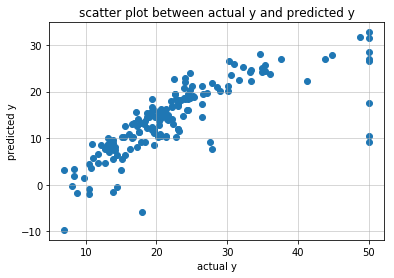

***********************************************************
mean sqare error= 104.10221490054883
number of iteration= 1


In [10]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, eta0=0.01, n_iter=1)

### manual sgd, n_iter=1, lr_rate=0.01,

In [32]:
def manual_fit(X, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=100):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        t+=1
        
    return w_new, b_new



def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(test_data,y_pred):
    #scatter plot
    plt.scatter(test_y,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()
    print('**************************************************************')
    
    manual_error=mean_squared_error(test_y,y_pred)
    print('mean square error=',manual_error)
    return manual_error

In [33]:
w, b=manual_fit(X=manual_train, n_iter=1)

In [34]:
y_pred=pred(test_data, w=w, b=b)

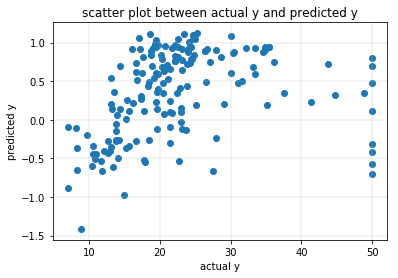

**************************************************************
mean square error= 582.8109111664287


In [35]:
manual_error=plot_(test_data,y_pred)

In [15]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-7.66318343e-01  4.05932953e-01 -7.69664649e-01  2.07291619e-03
 -5.49420612e-01  2.78734711e+00 -4.72758693e-01 -9.86250549e-01
  4.93112659e-02 -7.30405791e-01 -1.81856458e+00  6.66392093e-01
 -2.22057941e+00]
*********************************************************************************
manual sgd weight---
 [[ 0.01773412 -0.02722097 -0.01226162 -0.08932558 -0.03987773  0.05896966
  -0.01288296  0.0862911  -0.12271151 -0.07994501  0.26965425 -0.1876901
  -0.11868032]]


In [16]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 13


In [17]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [14.7207589]
manual sgd intercept= [0.3476]


###  SGDRegressor, n_iter=100, lr_rate=0.01

/Users/sapan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


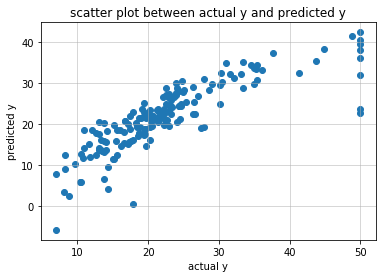

***********************************************************
mean sqare error= 28.18149548211394
number of iteration= 100


In [18]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, eta0=0.01, n_iter=100)

### manual sgd, n_iter=100, lr_rate=0.01

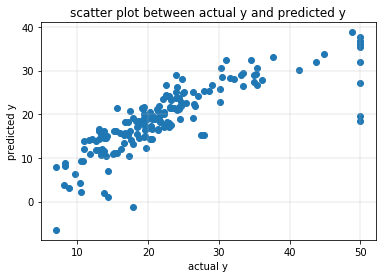

**************************************************************
mean square error= 41.97610741539215


In [19]:
w, b=manual_fit(X=manual_train, n_iter=100)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot_(test_data,y_pred)

In [20]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-1.27113571  0.81578094 -0.24405498  0.21527108 -1.44930572  2.79318682
 -0.32069781 -2.8184657   2.65640108 -1.86890373 -2.11199902  1.04081853
 -3.30890874]
*********************************************************************************
manual sgd weight---
 [[-1.05686217  0.26764337 -0.85985368  0.24439886 -0.2956493   2.56474872
  -0.1298021  -1.69853492  0.41957586 -0.09327634 -2.36953134  0.29377063
  -3.49531106]]


In [21]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 8


In [22]:
print('sklearn sgd intercept=',b_sgd)
print('manual sgd intercept=',b)
b_diff.append(abs(b_sgd-b))

sklearn sgd intercept= [22.53967368]
manual sgd intercept= [19.58874297]


### 1.5 SGDRegressor, n_iter=1000, lr_rate=0.01, lr_rate_variation='constant'

/Users/sapan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


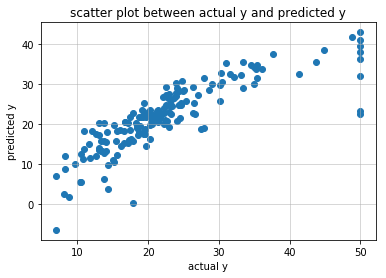

***********************************************************
mean sqare error= 28.589901928312848
number of iteration= 1000


In [23]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, eta0=0.01, n_iter=1000)

### manual sgd, n_iter=1000, lr_rate=0.01

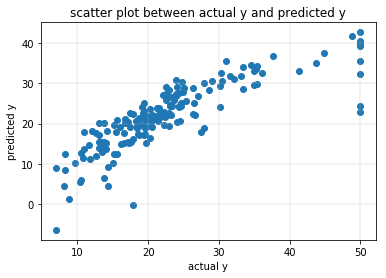

**************************************************************
mean square error= 28.757739043487707


In [24]:
w, b=manual_fit(X=manual_train, n_iter=1000)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot_(test_data,y_pred)

In [25]:
print('sklearn sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('manual sgd weight---\n',w)

sklearn sgd weight---
 [-1.31568811  0.86589411 -0.17221357  0.19208703 -1.49681919  2.79470617
 -0.33018959 -2.76831413  2.97090847 -2.27962962 -2.13692225  1.0644306
 -3.34106126]
*********************************************************************************
manual sgd weight---
 [[-1.34046     0.66185151 -0.35108265  0.40110589 -0.97021866  2.56987003
  -0.48377165 -2.79618973  2.08957349 -1.38788024 -2.3997573   1.14335436
  -3.40575773]]


In [26]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

number of points more than 30% in percent= 7


In [28]:
print('sklearn sgd loss=',b_sgd)
print('manual sgd loss=',b)
b_diff.append(abs(b_sgd-b))

sklearn sgd loss= [22.53797378]
manual sgd loss= [22.48647406]


##### observation
With high no of iteration , manual sgd performs almost same as SGDRegressor

## Conclusion
* we have taken 'constant' learning rate variation in SGDRegressor and the same in manual sgd regressor
* we can  seen that with higher number of iteration , manual sgd seems similar to SGDRegressor 
* in manual sgd regressor , error reduces with increasing in iteration number